In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import scipy.spatial as ss
import numpy.random as rd

# Bayesian Linear Regression

### Objetive: 

Implement a bayesian linear regression model using a normal distribution as a conjugate prior.
Use maximum likelihood type 2 to estimate all the parameters that can't be marginalized.

### Data:

The file './lab2/ejemplo_regresion.csv' contains the data for this laboratory.

- The first column represents the input x
- The second column represents the output y
- The third column represents the observed data (output):  y + noise

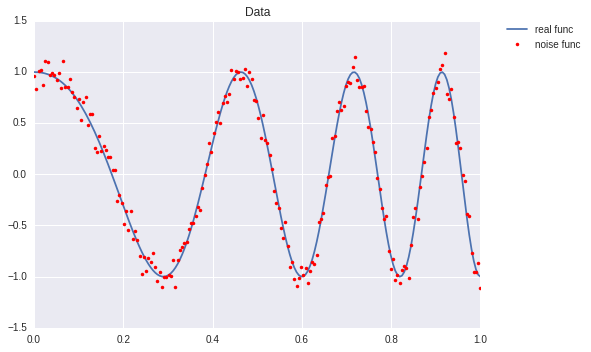

In [2]:
data = np.loadtxt('./lab2/ejemplo_regresion.csv', delimiter=',')

plt.plot(data[:,0], data[:,1], label='real func')
plt.plot(data[:,0], data[:,2], 'r.', label='noise func')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Data')
plt.show()

## Model:

The linear regression can be modeled as: 

\begin{align*}
\mathbf{y} = f(\mathbf{w}, \mathbf{x}) = \mathbf{w}\mathbb{\phi}(\mathbf{x})
\end{align*}

### 1. Linear basis function

In this case we are using a gaussian kernel as basis function for the linear regression.
This treatment is done in order to  allow the function $ y(x, w) $to be a non-linear 
function of the input vector $ x $. 

\begin{align*}
\mathbb{\phi}_{i,j} = exp{\left( \frac{{(x_i - x_j)}^2}{2\sigma^2}  \right) }
\end{align*}

Where $ \sigma^2 $ is assumed as a known parameter and represents the variance of the data. 
In the next section we use one technique to estimate this parameter.

### 2. Parameter distribution

We introduce a prior probability distribution over the parameters $\mathbf{w}$. This prior
is given by a gaussian distribution with parameters $\mathbf{m_0}$ and $\mathbf{S_0}$

\begin{align*}
    p(\mathbf{w}) = \mathcal{N}(\mathbf{w} \vert \mathbf{m_0}, \mathbf{S_0})
\end{align*}

### 3. Likelihood 

The likelihood function is given by

\begin{align*}
    p(\mathbf{t} \vert \mathbf{x}, \mathbf{w}, \mathbf{\beta}) = 
         \mathcal{N}(\mathbf{t} \vert f(\mathbf{w}, \mathbf{x}), \mathbf{\beta}^{-1})
\end{align*}

### 4. Posterior

The posterior distribution is given by: (Bishop 3.49)

\begin{align*}
    p(\mathbf{w} \vert \mathbf{x}, \mathbf{t}, \mathbf{\beta}, \mathbf{m_0}, \mathbf{s_0} ) & = 
         \mathcal{N}(\mathbf{w} \vert \mathbf{m_N}, \mathbf{S_N}) \\ 
    S_N & = {S_0}^{-1} + \mathbf{\beta} \mathbf{\phi}^{\top} \mathbf{\phi}\\
    m_N & = S_N ( {S_0}^{-1}m_0 +  \mathbf{\beta} \mathbf{\phi}^{\top} \mathbf{t} )
\end{align*}


## Regression:

### 1. Initialization of params

We initialized the prior distribution as:

\begin{align*}
    p(\mathbf{w}) = \mathcal{N}(\mathbf{0}, \alpha^{-1}\mathbf{I})
\end{align*}

Were $ \alpha $ is a hyparameter that controls the precision of the prior.

### 2. Finding hyperparameters

At this moment we have two hyperparameters, $\alpha$ and $\beta = \frac{1}{\sigma^2}$, in a fully bayessian
treatment we would introduce some prior distribution over that parameters, we can easily see that this 
is a recursive problem without base case. Instead of that, we use the _**evidence approximation**_ to find the 
hyperparameters by maximizing the marginal likelihood (integrating over $w$).


iter 21.9034785396 242.540162575
iter 4.11057898799 225.13767865
iter 3.01935326301 226.800104134
iter 2.94023676832 227.253550582
iter 2.94395376103 227.306758993
iter 2.946747172 227.307841509
iter 2.94730273519 227.3067776
iter 2.94736237797 227.306504356
iter 2.94736246913 227.306467346


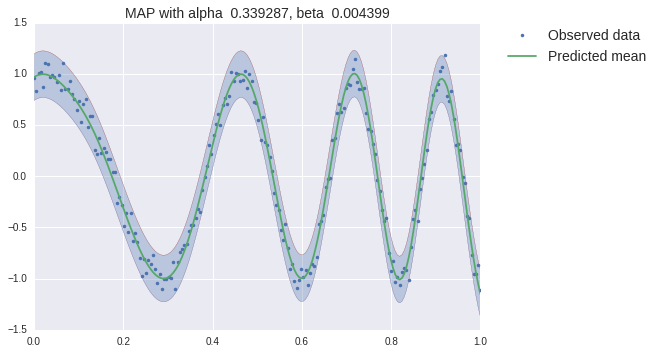

iter 2.29084326938 108.307808015
iter 0.149671796446 216.606446576
iter 0.850817408088 229.860520001
iter 2.22410413816 228.804357936
iter 2.84243578327 227.70440933
iter 2.94335116655 227.368231789
iter 2.9490763477 227.31105002
iter 2.94785687843 227.306002529
iter 2.94743318959 227.30624566
iter 2.94736518444 227.306426579
iter 2.94735989752 227.30646247
2.94736035251
227.306466314


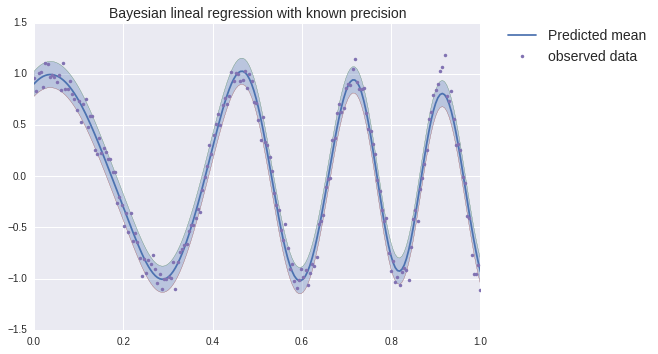

iter 1.93572177724 254.767906347
iter 3.99864518516 229.070083145
iter 3.16831703565 227.024374297
iter 2.97429651137 227.207338404
iter 2.94832852558 227.290965542
iter 2.94692301692 227.305331352
iter 2.94723538053 227.306586178
iter 2.94734243558 227.306522012
iter 2.94735951414 227.306476162
2.94736082551
227.306467129


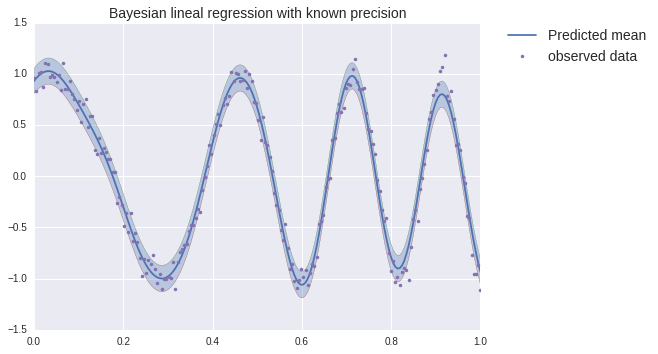

iter 23.9240701516 210.47679734
iter 2.65554915781 223.088628794
iter 2.72793765413 227.223150828
iter 2.90131036891 227.393037344
iter 2.9422447941 227.329160878
iter 2.94732205844 227.309606346
iter 2.94747816195 227.30663321
iter 2.94738880498 227.306427331
iter 2.94736425709 227.306453074
iter 2.94736077881 227.30646412
2.94736057951
227.306466042


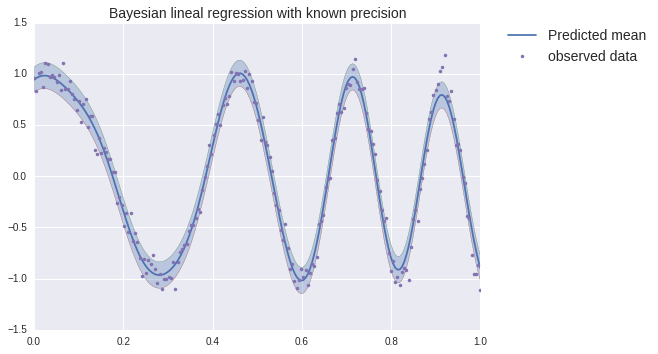

iter 1366.12928202 105.191084743
iter 12.7013348977 158.437015585
iter 0.934838685947 220.03499278
iter 1.93923512782 228.217162423
iter 2.73172484344 227.830945138
iter 2.92615273698 227.420756711
iter 2.947986199 227.320478884
iter 2.94803134244 227.306892927
iter 2.94750048939 227.30621899
iter 2.94737646189 227.306398417
iter 2.9473608473 227.306456607
2.94736029398
227.306465652


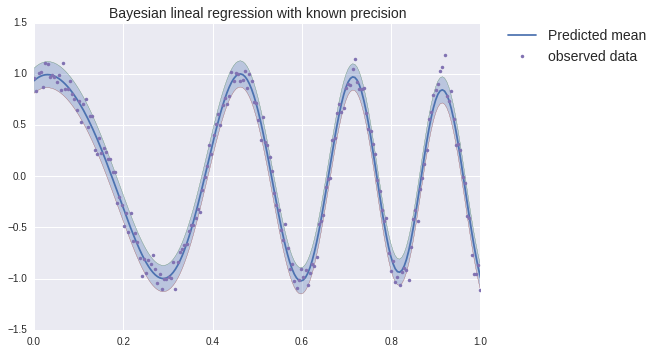

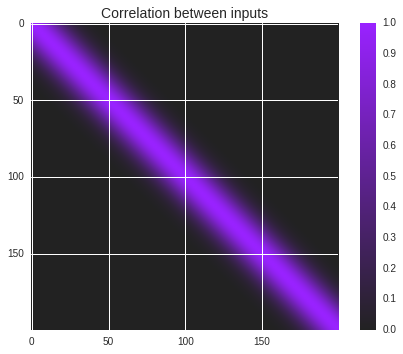

In [3]:
def t_phi(X, Y, sig=0.5): # Don't use!! still wrong ):
    d = ss.distance.cdist(X, Y,'sqeuclidean')
    d = np.exp(-(d / (2 * sig)))
    return d

def comp_phi(X1, X2, beta):
    sig = 1.0 / beta
    n = X1.shape[0]
    m = X2.shape[0]
    phi = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            d = X1[i] - X2[j]
            phi[i][j] = np.exp(-(d.T.dot(d)) / (2 * sig))
    return phi

def gen_prior(X, alpha, beta):
    sigpri = 1.0 / alpha
    siglike = 1.0 / beta
    return rd.normal(0, sigpri, (X.shape[0], 1)), siglike * np.eye(X.shape[0])

def w_MAP(X, Y, alpha, beta): 
    la = alpha / beta
    C = X.transpose().dot(X)
    s = X.shape[1]
    D = np.linalg.inv(C + la * np.eye(s, s))
    return D.dot(X.transpose()).dot(Y)
    
def posterior(X, y, m0, s0, beta):
    sn = np.linalg.pinv(np.linalg.pinv(s0) + beta * X.T.dot(X))
    mn = sn.dot(np.linalg.inv(s0).dot(m0) + beta * (X.T.dot(y)))
    return mn, sn

def plot_model(x, m, v):
    v = np.diag(v)
    upper=m + 2 * np.sqrt(v)
    lower=m - 2 * np.sqrt(v)
    plt.plot(x,m, label='Predicted mean')
    plt.fill(np.hstack((x,x[::-1])),np.hstack((upper,lower[::-1])),alpha=0.3)
    plt.plot(x,upper,linewidth=0.2)
    plt.plot(x,lower,linewidth=0.2)

def plot_MAP(x, y, phi, yn, wmap, alpha, beta):
    mean = phi.dot(wmap)
    cov = alpha / beta * np.eye(phi.shape[0])
    eps = 1e-9
    plt.title('MAP with alpha  %f, beta  %f' % (1.0 / alpha, 1.0 / beta), fontsize = 14)
    plt.plot(x, yn, '.', label="Observed data")
    plot_model(x, mean[:,0], cov)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    plt.show()

def clean_data():
    n = data.shape[0]
    X = data[:,0].reshape((n, 1))
    X = np.hstack((X, np.ones((n, 1))))
    y = data[:,1].reshape((n, 1))
    yn = data[:,2].reshape((n, 1))
    return X, y, yn
    

def comp_eig(beta, phi):
    a = beta * phi.T.dot(phi)
    return np.linalg.eig(a)[0].real

def comp_mn(alpha, beta, phi, t):
    A = alpha * np.eye(phi.shape[0]) + beta * phi.T.dot(phi)
    return beta * np.linalg.pinv(A).dot(phi.T).dot(t)
    
def comp_gamma(alpha, eig):
    den = alpha + eig
    return np.sum(eig / den)

def comp_alpha(mn, gamma):
    den = (mn.T.dot(mn))[0][0]
    return gamma / den

def comp_beta(t, mn, phi, gamma):
    n = len(t)
    den = n - gamma
    d = t - mn.T.dot(phi)
    num = np.sum(d ** 2)
    return num / den

def opt_hparams(alpha, beta, X, y, iters=100, tol=1e-5):
    for i in range(iters):
        phi = comp_phi(X, X, beta)
        eig = comp_eig(beta, phi)
        gamma = comp_gamma(alpha, eig)
        mn = comp_mn(alpha, beta, phi, y)
        alpha_ant = alpha
        alpha = comp_alpha(mn, gamma)
        beta_ant = beta
        beta = comp_beta(y, mn, phi, gamma)
        if (abs(alpha_ant - alpha) < tol and abs(beta_ant - beta) < tol):
            break
        print ("iter", alpha, beta)
        
    return alpha, beta

def plot_corr(z):
    cmap = sb.dark_palette("#9922ff", as_cmap=True)
    plt.imshow(z, cmap=cmap)
    plt.colorbar()
    plt.title('Correlation between inputs', fontsize=14)
    plt.show()

def linreg_MAP():
    X, y, yn = clean_data()
    beta = 1.0 / 0.001 # likelihood precision
    alpha = 1.0 / 0.01 # prior precision
    
    alpha, beta = opt_hparams(alpha, beta, X, yn)
    z = comp_phi(X, X, beta)
    
    wmap = w_MAP(z, y, alpha, beta)
    ymap = z.T.dot(wmap)
    plot_MAP(X[:,0], y[:,0], z, yn, wmap, alpha, beta)
    
def linreg_bayesian_mean(alpha, beta):
    X, y, yn = clean_data()
    alpha, beta = opt_hparams(alpha, beta, X, yn)
    
    print (alpha)
    print (beta)
    
    z = comp_phi(X, X, beta)
    wp, bp = gen_prior(z, alpha, beta)
    wt, bt = posterior(z, yn, wp, bp, beta)
    
    ye = z.T.dot(wt)
    
    plot_model(X[:,0], ye[:,0], bt)
    plt.plot(X[:,0], yn[:,0], '.', label = 'observed data')
    plt.title('Bayesian lineal regression with known precision', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    plt.show()

    return z
              
linreg_MAP()
linreg_bayesian_mean(1.0, 1.0)
linreg_bayesian_mean(1.0, 1.0 / 0.001)
linreg_bayesian_mean(10000, 1000)
z = linreg_bayesian_mean(0.1, 0.01)
plot_corr(z)

### Conclusions

- The bayesian linear regression is highly dependent on the hyperparameters, but this problem can be solved numerically using maximum a posteriori type 2 (or evidence approximation).  For this particular problem the evidence approximation was very robust, finding always the optimal values for the hyperparameters.

- In this case the optimization of the hyperparameters converges in (approx) 12 iterations.

- We compared the bayesian linear regression with the Maximum Aposteriori approach and we found that the MAP approach leads to a bigger variance. 